In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

# Read data

In [2]:
df = pd.read_excel('/Users/mdbartos/Desktop/ENGR100_Lab_3.xlsx')

In [3]:
xlabel = 'ORP [mV]'
ylabel = 'HACH Cl2 Concentration [g/L]'
zlabel = 'Absorbance [-]'
clabel = 'Section'

x = df[xlabel]
y = df[ylabel]
z = df[zlabel]
c = df[clabel]

sections = {
    201 : '9:30',
    205 : '12:30',
    203 : '2:30'
}

# Create scatterplot of ORP vs. Cl for all sessions

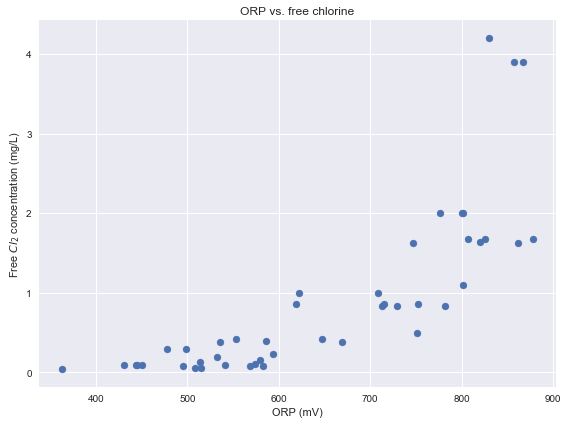

In [4]:
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(x, y)
plt.xlabel('ORP (mV)')
plt.ylabel('Free $Cl_2$ concentration (mg/L)')
plt.title('ORP vs. free chlorine')
plt.tight_layout()

# Create scatterplots of ORP vs. Cl by session

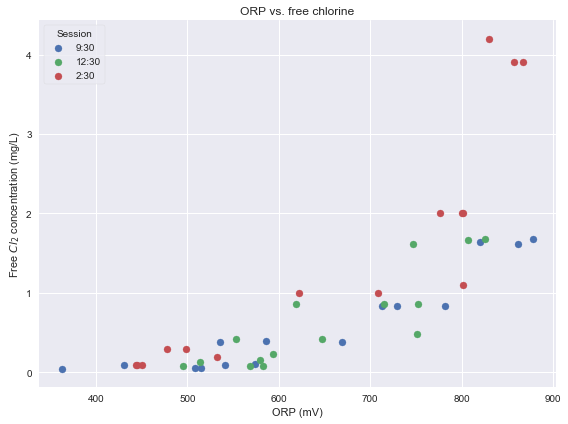

In [5]:
fig, ax = plt.subplots(figsize=(8,6))
for section in sections:
    query = df[df[clabel] == section]
    ax.scatter(query[xlabel], query[ylabel], label=sections[section])
    
plt.xlabel('ORP (mV)')
plt.ylabel('Free $Cl_2$ concentration (mg/L)')
plt.title('ORP vs. free chlorine')
plt.legend(frameon=True, title='Session')
plt.tight_layout()

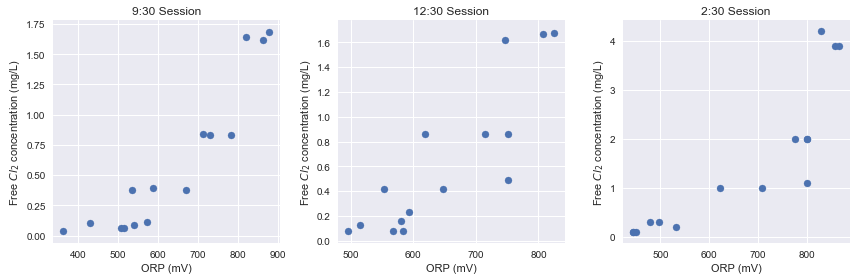

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))

for i, section in enumerate(sections):
    query = df[df[clabel] == section]
    ax.flat[i].scatter(query[xlabel], query[ylabel])
    ax.flat[i].set_title('{0} Session'.format(sections[section]))
    ax.flat[i].set_xlabel('ORP (mV)')
    ax.flat[i].set_ylabel('Free $Cl_2$ concentration (mg/L)')
    
plt.tight_layout()

# Compute least-squares regression for ORP vs. Cl

In [7]:
Y = np.column_stack([np.log(y), np.ones(y.size)])
x_ = x.values
a, b = np.linalg.inv(Y.T @ Y) @ Y.T @ x_

In [8]:
xhat = np.linspace(300, 900, 1000)
yhat = np.exp((xhat - b)/a)
r2 = np.corrcoef(np.exp((x - b)/a), y)[0,1]**2

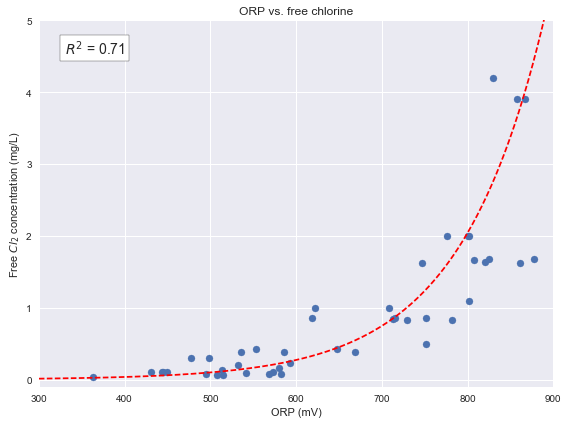

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(x, y)
plt.plot(xhat, yhat, c='r', linestyle='--')
ax.text(0.05, 0.95, r'$R^2$ = {:.2f}'.format(r2, a, b), transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox={'facecolor' :'w'})

plt.xlabel('ORP (mV)')
plt.ylabel('Free $Cl_2$ concentration (mg/L)')
plt.title('ORP vs. free chlorine')
plt.xlim(300, 900)
plt.ylim(-0.1, 5)
plt.tight_layout()

In [10]:
print('Regression: ORP s. Cl')
print("\n\ny = exp((x - b)/a)\n")
print("a = {:.4f}".format(a))
print("b = {:.4f}".format(b))
print("r2 = {:.4f}".format(r2))

Regression: ORP s. Cl


y = exp((x - b)/a)

a = 99.3925
b = 728.9464
r2 = 0.7073


# Plot Hach kit measurement vs. Spec 20

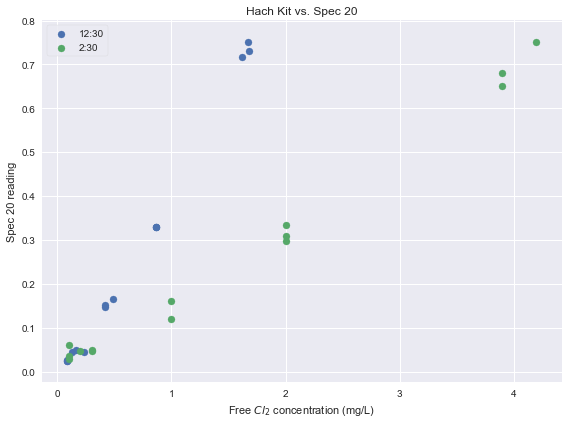

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
for section in sections:
    query = df[df[clabel] == section].dropna()
    if len(query) > 0:
        ax.scatter(query[ylabel], query[zlabel], label=sections[section])
    
plt.xlabel('Free $Cl_2$ concentration (mg/L)')
plt.ylabel('Spec 20 reading')
plt.legend(frameon=True)
plt.title('Hach Kit vs. Spec 20')
plt.tight_layout()

# Find regression for Hach vs. Spec 20

In [12]:
x203 = y[(c == 203) & (~np.isnan(z))]
y203 = z[(c == 203) & (~np.isnan(z))]
x205 = y[(c == 205) & (~np.isnan(z))]
y205 = z[(c == 205) & (~np.isnan(z))]
a203, b203 = np.polyfit(x203, y203, 1)
a205, b205 = np.polyfit(x205, y205, 1)
r2203 = np.corrcoef(a203*x203 + b203, y203)[0,1]**2
r2205 = np.corrcoef(a205*x205 + b205, y205)[0,1]**2

In [13]:
print('Regression, Hach vs. Spec 20: Session 203')
print("\n\ny = ax + b\n")
print("a = {:.4f}".format(a203))
print("a = {:.4f}".format(b203))
print("r2 = {:.4f}".format(r2203))

Regression, Hach vs. Spec 20: Session 203


y = ax + b

a = 0.1697
a = -0.0009
r2 = 0.9889


In [14]:
print('Regression, Hach vs. Spec 20: Session 205')
print("\n\ny = ax + b\n")
print("a = {:.4f}".format(a205))
print("a = {:.4f}".format(b205))
print("r2 = {:.4f}".format(r2205))

Regression, Hach vs. Spec 20: Session 205


y = ax + b

a = 0.4518
a = -0.0326
r2 = 0.9936


# Apply correction factor to Cl2 concentration from last session

In [15]:
df.loc[df[clabel] == 203, ylabel] *= 0.4

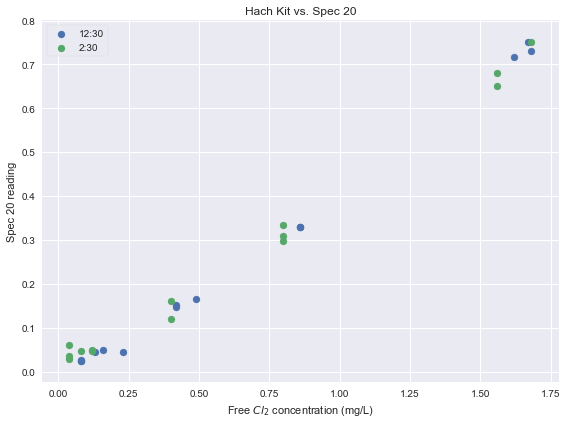

In [16]:
fig, ax = plt.subplots(figsize=(8,6))
for section in sections:
    query = df[df[clabel] == section].dropna()
    if len(query) > 0:
        ax.scatter(query[ylabel], query[zlabel], label=sections[section])
    
plt.xlabel('Free $Cl_2$ concentration (mg/L)')
plt.ylabel('Spec 20 reading')
plt.legend(frameon=True)
plt.title('Hach Kit vs. Spec 20')
plt.tight_layout()

# Find regression for Hach vs. Spec 20 with correction factor

In [17]:
xall = y[~np.isnan(z)]
yall = z[~np.isnan(z)]
aall, ball = np.polyfit(xall, yall, 1)
r2all = np.corrcoef(aall*xall + ball, yall)[0,1]**2

In [18]:
print('Regression, Hach vs. Spec 20 with correction factor')
print("\n\ny = ax + b\n")
print("a = {:.4f}".format(aall))
print("a = {:.4f}".format(ball))
print("r2 = {:.4f}".format(r2all))

Regression, Hach vs. Spec 20 with correction factor


y = ax + b

a = 0.4377
a = -0.0165
r2 = 0.9897


# Show scatterplot of ORP vs. Cl with correction factor

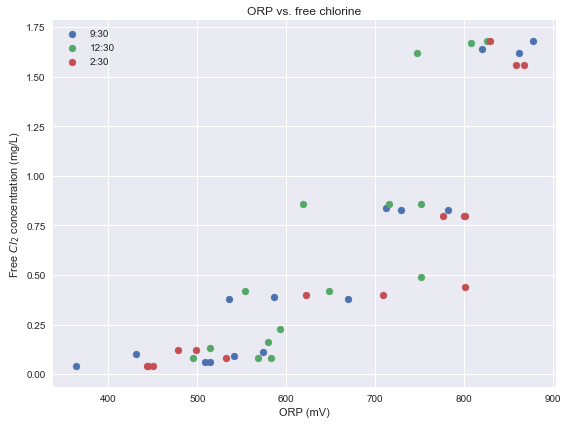

In [19]:
fig, ax = plt.subplots(figsize=(8,6))
for section in sections:
    query = df[df[clabel] == section]
    ax.scatter(query[xlabel], query[ylabel], label=sections[section])
    
plt.xlabel('ORP (mV)')
plt.ylabel('Free $Cl_2$ concentration (mg/L)')
plt.title('ORP vs. free chlorine')
plt.legend()
plt.tight_layout()

# Compute regression of ORP vs. Cl with correction factor

In [20]:
Y = np.column_stack([np.log(y), np.ones(y.size)])
x_ = x.values
a, b = np.linalg.inv(Y.T @ Y) @ Y.T @ x_

In [21]:
xhat = np.linspace(300, 900, 1000)
yhat = np.exp((xhat - b)/a)
r2 = np.corrcoef(np.exp((x - b)/a), y)[0,1]**2

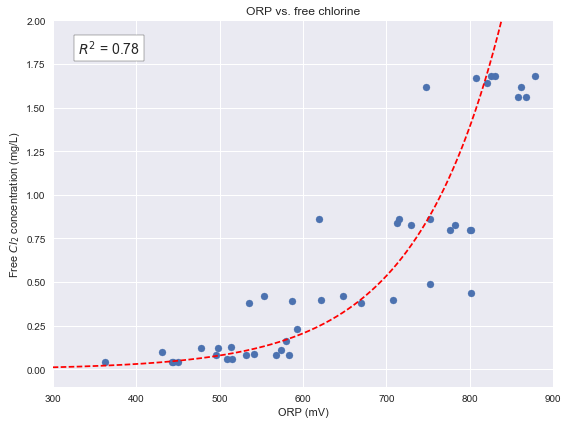

In [22]:
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(x, y)
plt.plot(xhat, yhat, c='r', linestyle='--')
ax.text(0.05, 0.95, r'$R^2$ = {:.2f}'.format(r2, a, b), transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox={'facecolor' :'w'})

plt.xlabel('ORP (mV)')
plt.ylabel('Free $Cl_2$ concentration (mg/L)')
plt.title('ORP vs. free chlorine')
plt.xlim(300, 900)
plt.ylim(-0.1, 2)
plt.tight_layout()

In [23]:
print('Regression: ORP s. Cl (with correction factor)')
print("\n\ny = exp((x - b)/a)\n")
print("a = {:.4f}".format(a))
print("b = {:.4f}".format(b))
print("r2 = {:.4f}".format(r2))

Regression: ORP s. Cl (with correction factor)


y = exp((x - b)/a)

a = 104.7434
b = 765.2892
r2 = 0.7770
